# Introduction

The aim of this project is to build different supervised learning models for the purpose of binary classification with a dataset of our choice. Afterwards, we will proceed to compare the different models. The methods we decided to work with are Logisitic Regression with PCA, K Nearest Neighbour, Boosted Decision Trees and a baseline model (Linear Regression).

We chose to look into heart disease and the data collected when deciding whether or not someone is potentially at risk. Heart disease is one of the most prevalent chronic diseases in the UK and on average 460 people die each day in the UK from a heart or circulatory disease. Healthcare costs relating to heart and circulatory diseases are estimated at £9 billion each year. Due to it's seriousness and the number of lives impacted by it annually we felt this would be an interesting topic to investigate. The ability to detect early signs of heart disease can be the difference between life and death. For more information about heart disease, please visit [BHF UK Factsheet](https://www.bhf.org.uk/-/media/files/research/heart-statistics/bhf-cvd-statistics---uk-factsheet.pdf).

We found an appropriate [heart disease dataset](https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/data) that covered the main three criteria we were looking for. The first was that the target variable, whether or not each individual has experienced heart disease or a heart attack, was binary. The second was that there was a large enough number of observations, which in this case was 441,456. Then the last one was to make sure there were enough relevant features to give us the ability to make accurate predictions. As this is an American dataset, the results may vary compared to the United Kingdom. For more information on the origins of the dataset visit [CDC – 2015 BRFSS Survey Data and Documentation](https://www.cdc.gov/brfss/annual_data/annual_2015.html?fbclid=IwAR0ek9MdZDMNTUFnlX6JGRPoVE1qAj6-5AFzdywFJ75TJH3m2Z4_hD31nn0).

Our plan for comparing the models is to inspect their ROC curves, and if there are overlaps, we will look at different performance metrics. Specifically, we will look at the recall of the models, as we are more concerned with limiting false negatives (missing a positive case of heart disease) than false positives. 





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Calvin%20Mcadam-Mubiru/Heart%20Disease%20Data/Original%20Heart%20Disease%20Data%20Sample.csv')
print('\033[1m' + "Sample of the 2015 BRFSS survey for heart disease:")
hd_data.head()

Sample of the 2015 BRFSS survey for heart disease:


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1,...,4,2,1,1,1,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1,...,2,2,3,3,4,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1,...,9,9,9,9,9,9,9,9.0,9.0,NaN
3,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000004,2015000004,1,...,4,2,1,1,1,1,1,NaN,NaN,9.0
4,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000005,2015000005,1,...,4,2,1,1,1,1,1,NaN,NaN,1.0


### Our Data

When we found the dataset on Kaggle, the user who had uploaded it had completed some data cleaning, and supplied the code used to complete it. When considering our data cleaning, we used some of their ideas which were well justified but decided not to on other aspects. For example, the user removed all rows with missing data without checking if the missing data might be important. We decided to run some initial models on the data that could deal with missing data and see if the results varied, in which case we would look into imputation methods. We found that there was a slight variation and so completed an imputation method based on k-nearest neighbours. All of the above will be shown in detail in section 02. For now, we explain the features after processing and how they can be interpreted. We also look briefly at the imputed training dataset and its characteristics.

* Heart Disease or Attack, the target variable - presented in 1's and 0's, where 1 is the presence of heart disease or attack. 
* High Cholesterol - 1 if present and 0 if not, or if they haven't been checked in the past 5 years. 
* Smoking - 1 indicates if a person has smoked more than 100 cigarettes and 0 otherwise. 
* High blood pressure - binary to indicate presence (1) or absence (0).
* Physical activity - binary to indicate whether they have engaged in physical activity outside of their regular job in the last 30 days (1) or not (0). 
* Stroke - if the patient has ever had a stroke (1) or not (0).
* Fruit - binary to indicate whether you eat fruit daily (1) or not (0). Vegetables is similar.
* Diabetes is 0 for absence, 1 for pre-diabetes or borederline and 2 is for presence. 
* Access to a health plan and medical costs are binary and indicate presence (1) or absence (0).
* General health is on a 1 to 5 scale, 1 being excellent and 5 being poor. 
* Bad mental health days and physical health are out of 30, where 1 is excellent and 30 is poor.
* Alcohol consumption - 14+ drinks a week for a man or 7+ for a woman is represented by a 1.
* Difficulty walking is binary (0 being yes, and 1 being no).
* Sex - 0 represents female and 1 represents male.
* Age is 1 if the case is between 18-24 up to 13 where the case is older than 80. This is in 5 year incements. 
* Education is rated 1 to 6 where 1 is never went to school or only went to nursery and 6 being college for 4 years or more. 
* Finally income where 1 means that your income is less than \\$10,000 up to 8 being \\$75,000 or more.

This is a preview of 5 rows of the processed data.

In [3]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Calvin%20Mcadam-Mubiru/Heart%20Disease%20Data/Adjusted%20Heart%20Disease%20Dataset')
hd_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


For KNN imputation, the data must be normalised, so the imputed dataset looks slightly different.

In [4]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Emelia%20Osborne/TrainingDataImputation.csv')
hd_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,0.5,1.0,0.27,0.5,0.5,0.333333,0.0,0.0,...,1.0,0.5,0.666667,0.032258,0.032258,1.0,0.0,1.000000,0.857143,0.000000
1,1.0,1.0,1.0,1.0,0.30,1.0,0.5,0.333333,0.5,1.0,...,1.0,0.5,1.000000,1.000000,1.000000,1.0,0.0,0.714286,0.857143,0.222222
2,1.0,1.0,1.0,1.0,0.27,1.0,0.5,0.333333,0.5,1.0,...,1.0,0.0,0.666667,0.032258,0.032258,0.5,1.0,1.000000,0.571429,0.555556
3,1.0,0.5,1.0,0.0,0.31,1.0,0.5,0.333333,0.5,0.5,...,1.0,0.5,0.666667,0.032258,0.000000,0.5,1.0,0.928571,0.428571,0.444444
4,1.0,1.0,1.0,1.0,0.28,1.0,1.0,0.333333,1.0,1.0,...,1.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,0.714286,0.714286,0.444444


### Exploratory Data Analysis

To start with, this gives us information about the dataset and the variables, which can be understood using the list given above. We can see that there are no null entries.

In [5]:
hd_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412514 entries, 0 to 412513
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  412514 non-null  float64
 1   HighBP                412514 non-null  float64
 2   HighChol              412514 non-null  float64
 3   CholCheck             412514 non-null  float64
 4   BMI                   412514 non-null  float64
 5   Smoker                412514 non-null  float64
 6   Stroke                412514 non-null  float64
 7   Diabetes              412514 non-null  float64
 8   PhysActivity          412514 non-null  float64
 9   Fruits                412514 non-null  float64
 10  Veggies               412514 non-null  float64
 11  HvyAlcoholConsump     412514 non-null  float64
 12  AnyHealthcare         412514 non-null  float64
 13  NoDocbcCost           412514 non-null  float64
 14  GenHlth               412514 non-null  float64
 15  

The describe function provides basic statistical details about our dataset. Only columns containing numerical values are displayed but all of our features are numerical values already. The 'T' following the describe function transposes the output table.

In [6]:
hd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,412514.0,0.069411,0.254152,0.0,0.000000,0.000000,0.000000,1.0
HighBP,412514.0,0.695696,0.246903,0.0,0.500000,0.500000,1.000000,1.0
HighChol,412514.0,0.605806,0.336791,0.0,0.500000,0.500000,1.000000,1.0
CholCheck,412514.0,0.892970,0.243270,0.0,1.000000,1.000000,1.000000,1.0
BMI,412514.0,0.256821,0.100014,0.0,0.230000,0.260000,0.300000,1.0
Smoker,412514.0,0.686885,0.279861,0.0,0.500000,0.500000,1.000000,1.0
Stroke,412514.0,0.517856,0.098330,0.0,0.500000,0.500000,0.500000,1.0
Diabetes,412514.0,0.344209,0.087280,0.0,0.333333,0.333333,0.333333,1.0
PhysActivity,412514.0,0.794167,0.321738,0.0,0.500000,1.000000,1.000000,1.0
Fruits,412514.0,0.732088,0.333699,0.0,0.500000,1.000000,1.000000,1.0


Below shows the number of recorded observations of cases with heart disease or attack compared to ones without. As you can see, our dataset has a large class imbalance as there are many more negative heart disease cases. We will consider this throughout this project through weighting measures in our models, our choice of performance metric and how we downsample our data.

0.0    383881
1.0     28633
Name: HeartDiseaseorAttack, dtype: int64


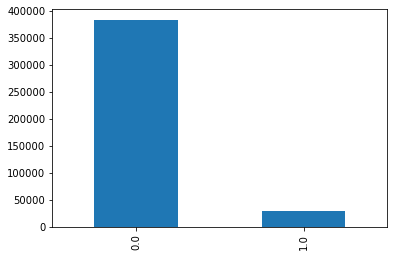

In [7]:
print(hd_data.HeartDiseaseorAttack.value_counts())
p=hd_data.HeartDiseaseorAttack.value_counts().plot(kind="bar")

Below is a visualisation for each of the different features of the data. It illustrates the distribution of the feature values and important characteristics such as mode and range. It must be kept in mind when interpreting these that many of the categories are discrete.

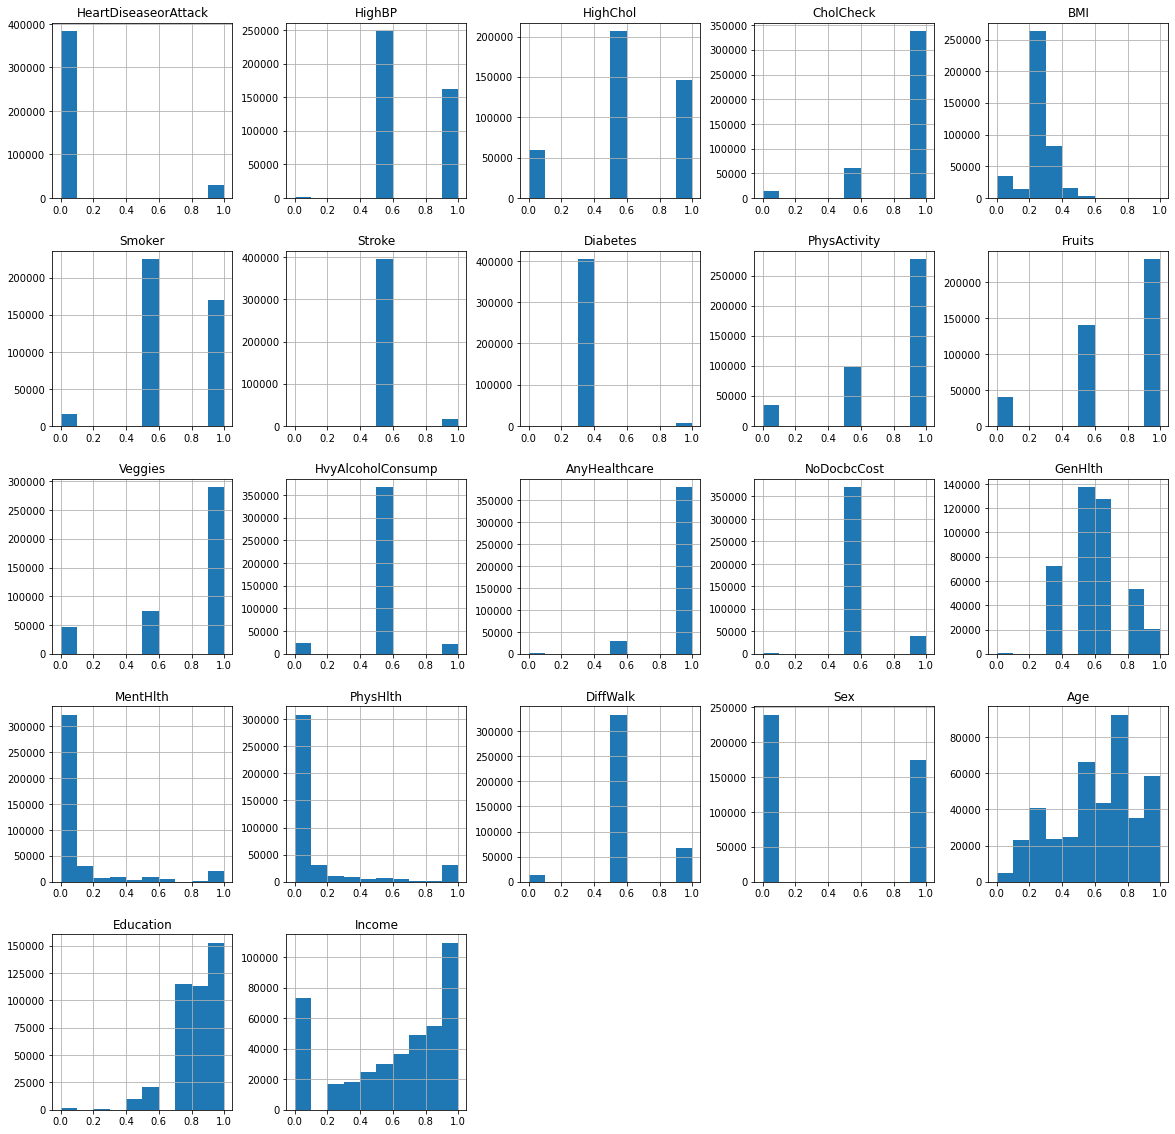

In [8]:
h = hd_data.hist(figsize = (20,20))